# Time series processing SWITCH

In [34]:
import pandas as pd
import numpy as np

In [35]:

import datetime

from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from pmdarima import model_selection

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定

In [36]:
df_original = pd.read_excel("./switch.xlsx")
df_original

,weekly,sales,nintendo_of_america_views,nintendo_of_america_subscribers,mrlololoshka_views,mrlololoshka_subscribers,born2kill_views,born2kill_subscribers,play_nintendo_views,play_nintendo_subscribers,...,gamekiller_view,gamekiller_subscribers,nexorflane_view,nexorflane_subscribers,gaming_with_leo_view,gaming_with_leo_subscribers,seekertv_view,seekertv_subscribers,ビエラ_view,ビエラ_subscribers
0,2024-06-08,156.5k,4262474,0,19728458,0,568568,10000,1379629,4000,...,23124,0,28268,0,12922,0,28113,0,360944,0
1,2024-06-15,138.9k,3132222,10000,14514821,0,476165,0,1417092,3000,...,26771,0,25339,-1000,12904,0,21501,0,176648,0
2,2024-06-22,142.1k,20532032,40000,18308669,0,461158,10000,1154672,3000,...,26341,0,29027,0,12908,-1000,28167,0,242651,0
3,2024-06-29,152.8k,913510,0,15307409,100000,488963,0,796886,2000,...,20669,0,25250,0,12680,0,19034,0,173042,0
4,2024-07-06,164.8k,-11598914,10000,15763279,0,549160,10000,866283,2000,...,16721,-1000,24929,0,13788,-1000,-59966,0,304801,0


In [37]:
df_x = df_original.drop(columns=["sales", "weekly"])
df = df_x.applymap(lambda x: np.log(x) if x > 0 else 0)
df["sales"] = df_original["sales"]
df["weekly"] = df_original["weekly"]

# convert the weekly column to datetime 
df['weekly'] = pd.to_datetime(df['weekly'])

# set weekly column to index
df.set_index('weekly', inplace=True)

# remove "k" from sales column
df['sales'] = df['sales'].str.replace('k', '').astype(float) * 1000

(array([19883., 19887., 19891., 19895., 19899., 19903., 19905., 19909.]),
 [Text(19883.0, 0, '2024-06-09'),
  Text(19887.0, 0, '2024-06-13'),
  Text(19891.0, 0, '2024-06-17'),
  Text(19895.0, 0, '2024-06-21'),
  Text(19899.0, 0, '2024-06-25'),
  Text(19903.0, 0, '2024-06-29'),
  Text(19905.0, 0, '2024-07-01'),
  Text(19909.0, 0, '2024-07-05')])

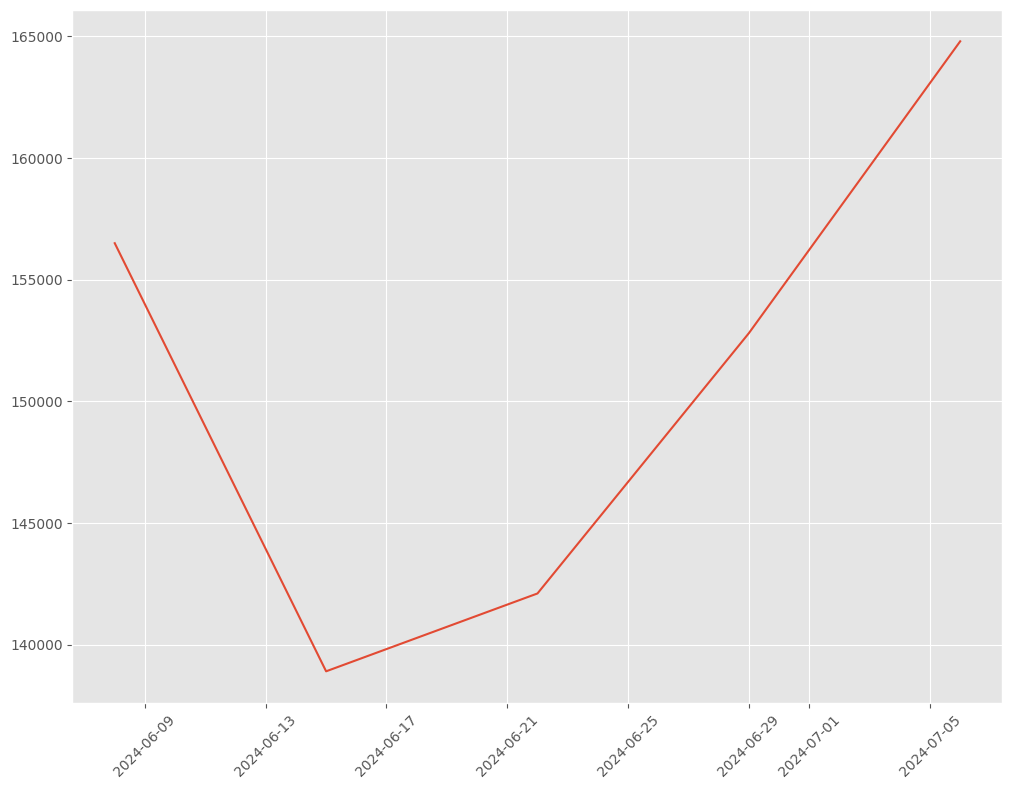

In [38]:
plt.plot(df["sales"])
plt.xticks(rotation=45)

# Data analysis SWITCH

### ARIMA

In [39]:
# making new data frame for arima model 

# reseting the index of the dataframe 
df_reset = df.reset_index()

# df_sales, newdataframe has only weekly and sales columns
df_sales = df_reset[["weekly", "sales"]]

# set weekly column as index
df_sales = df_sales.set_index("weekly")
df_sales

,sales
weekly,
2024-06-08,156500.0
2024-06-15,138900.0
2024-06-22,142100.0
2024-06-29,152800.0
2024-07-06,164800.0


In [40]:
# Split the dataset into training and test data (last 2 weeks)

from pmdarima import model_selection

# Ensure that the index is datetime
df_sales.index = pd.to_datetime(df_sales.index)

train, test = model_selection.train_test_split(df_sales, test_size=2) 

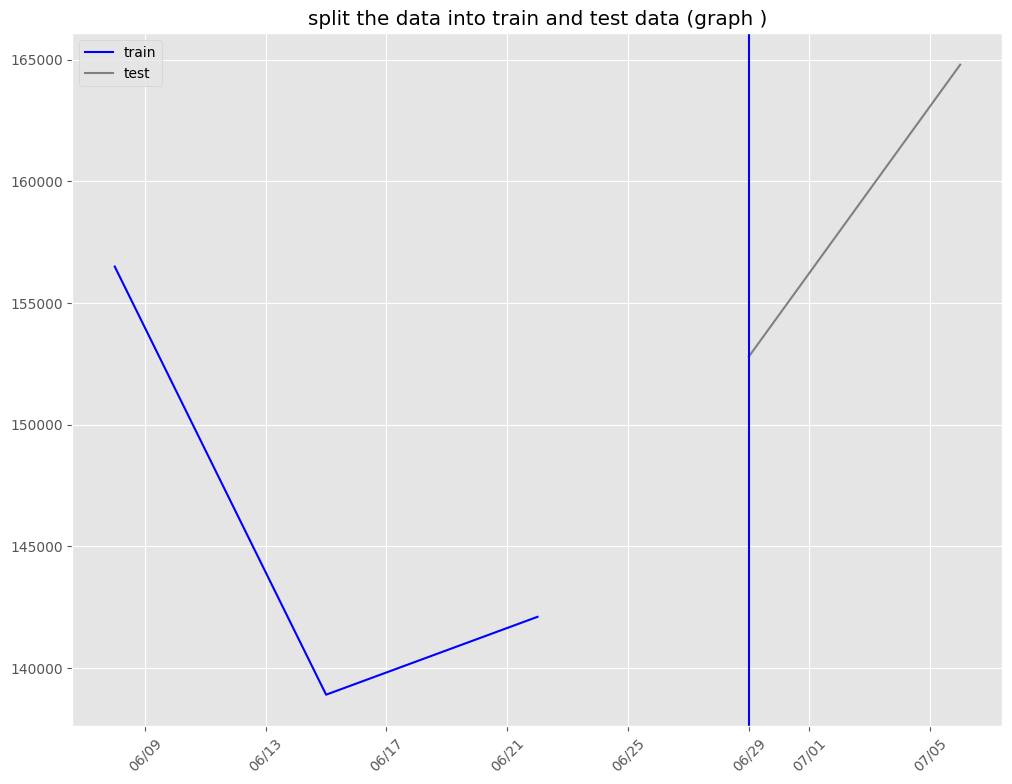

In [41]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'train' and 'test' DataFrames are already defined and have a DateTime index

fig, ax = plt.subplots()

# plot the train data
ax.plot(train.index.values, train.values, label='train', color='blue')

# plot the test data 
ax.plot(test.index.values, test.values, label='test', color='gray')

# Depiction of vertical lines between training and test data
ax.axvline(datetime.datetime(2024, 6, 29), color='blue')

# Format the x-axis to show only the month and day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)


ax.legend()
plt.title("split the data into train and test data (graph )")
plt.show()


In [42]:
from pmdarima import auto_arima
# Predictive model training (using training data)

# train 
arima_model = auto_arima(train)

# result
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    3
Model:                        SARIMAX   Log Likelihood                 -31.086
Date:                Wed, 21 Aug 2024   AIC                             66.172
Time:                        20:08:17   BIC                             64.369
Sample:                    06-08-2024   HQIC                            62.548
                         - 06-22-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.458e+05   8980.706     16.239      0.000    1.28e+05    1.63e+05
sigma2       5.86e+07   1.94e+08      0.301      0.763   -3.23e+08     4.4e+08
Ljung-Box (L1) (Q):                   0.56   Jarque-

In [43]:
# implement the forecasting

# Prediction of study data period
train_pred = arima_model.predict_in_sample()

# Prediction of test data period
test_pred = arima_model.predict(n_periods=2)

In [44]:
# evaluation

print('RMSE:\n',np.sqrt(mean_squared_error(test.sales, test_pred)))
print('MAE:\n',mean_absolute_error(test.sales, test_pred)) 
print('MAPE:\n',mean_absolute_percentage_error(test.sales, test_pred))

RMSE:
 14287.562578846128
MAE:
 12966.666666666657
MAPE:
 0.08034118250055061


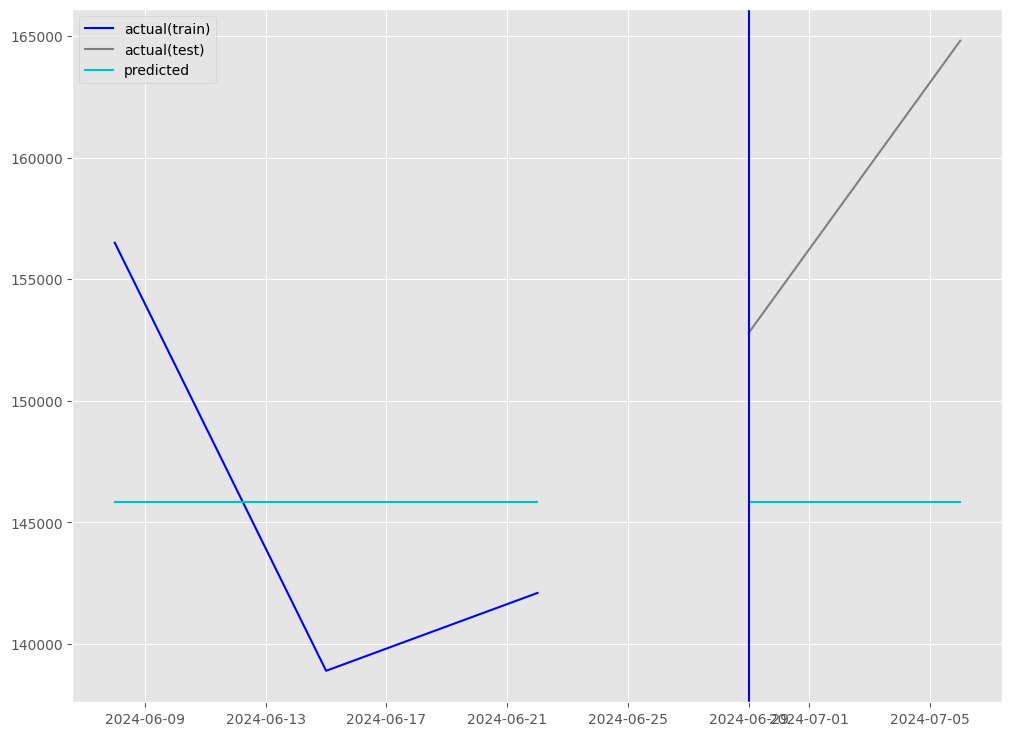

In [45]:
# plot the graph of actual and predicted values
import datetime

fig, ax = plt.subplots()

# actual value
## train
ax.plot(train.index.values, train.sales.values, label='actual(train)', color='blue')
## test
ax.plot(test.index.values, test.sales.values, label='actual(test)', color='gray')

# prediction
## train
ax.plot(train.index.values, train_pred.values, color='c')
## test
ax.plot(test.index.values, test_pred.values, label="predicted", color="c") 

# Depiction of vertical lines between training and test data
ax.axvline(datetime.datetime(2024,6,29),color='blue')

ax.legend()

plt.show()

### PCA regression 

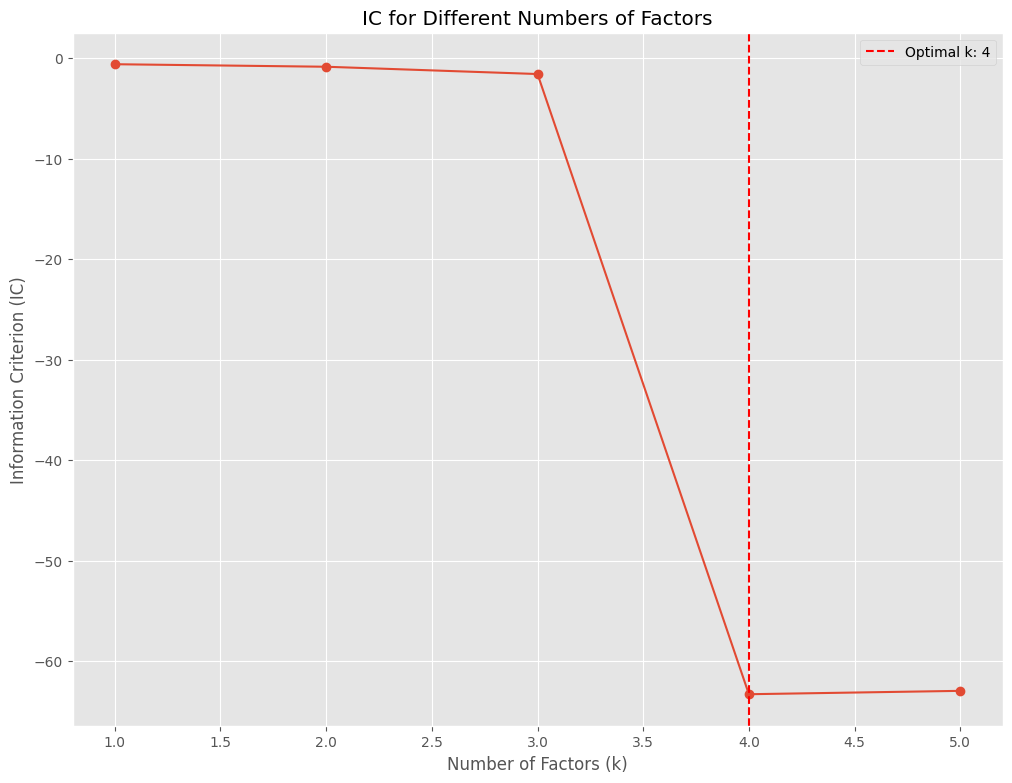

the optimal number of k: 4


In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm

X = df.drop("sales", axis=1)

# standardized
X_standardized = (X - X.mean()) / X.std()

# NaN is filled with 0
X_standardized = X_standardized.fillna(0)

# setting the parameters
N, T = X_standardized.shape
max_k = min(N, T, 20)  # maximum number of principal components

# the function that calculate the information criteria
def calculate_ic(X, k, N, T):
    pca = PCA(n_components=k)
    pca.fit(X)
    F = pca.transform(X)
    Lambda = pca.components_.T
    V_k = np.sum((X - F @ Lambda.T) ** 2) / (N * T)
    IC_k = np.log(V_k) + k * (N + T) / (N * T) * np.log(N * T / (N + T))
    return IC_k

# selecting the optimal number of components so that IC is minimized
ic_values = [calculate_ic(X_standardized.values, k, N, T) for k in range(1, max_k + 1)]
optimal_k = np.argmin(ic_values) + 1

# plot IC
plt.plot(range(1, max_k + 1), ic_values, marker='o')
plt.xlabel('Number of Factors (k)')
plt.ylabel('Information Criterion (IC)')
plt.title('IC for Different Numbers of Factors')
plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k: {optimal_k}')
plt.legend()
plt.show()

print(f"the optimal number of k: {optimal_k}")

In [47]:
# standardinzing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# pca
pca = PCA(n_components=optimal_k)

principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components)
pca_df

,0,1,2,3
0,-2.336614,4.961960,-0.892332,-1.694317
1,-1.077757,-4.379296,0.264280,-2.615959
2,-3.450459,-1.406006,-2.407053,2.725349
3,0.489166,0.548093,5.004071,1.270634
4,6.375664,0.275249,-1.968966,0.314292


In [48]:
# Split the dataset into training and test data (last 2 weeks)

pca_df["sales"] = df_original["sales"]
# remove "k" from sales column
pca_df['sales'] = df_original['sales'].str.replace('k', '').astype(float) * 1000

# convert the weekly column to datetime 
pca_df['weekly'] = pd.to_datetime(df_original['weekly'])

# set weekly column to index
pca_df.set_index('weekly', inplace=True)


# split the data into train and test data
train, test = model_selection.train_test_split(pca_df, test_size=2)

# train
y_train = train['sales']              #dependet variable y
X_train = train.drop('sales', axis=1) #independent variable X

# test
y_test = test['sales']              #dependent variable y
X_test = test.drop('sales', axis=1) #independent variable X

In [49]:
# instance
regressor = LinearRegression()

# train
regressor.fit(X_train, y_train)

# intercept and coefficients
print('intercept:',regressor.intercept_)
print('coefficients:',regressor.coef_)

intercept: 146159.84270795135
coefficients: [  -8.69306852 1934.54516818   54.80389159 -454.23131926]


In [50]:
# prediction (train data)

train_pred = regressor.predict(X_train)

In [51]:
# prediction（test data）

# copy of the train data 
y_train_new = y_train.copy()

# Forecasting is performed while updating the explanatory variable X
for i in range(len(y_test)):
    
    # Implementation of forecasts for the current period
    X_value =  X_test.iloc[i:(i+1),:]
    y_value_pred = regressor.predict(X_value)
    y_value_pred = pd.Series(y_value_pred,index=[X_value.index[0]])
    y_train_new = pd.concat([y_train_new,y_value_pred])
    
    #Calculation of the explanatory variable X for the next period
    f1 = y_train_new.iloc[-1] 
    f2 = y_train_new.iloc[-1]
    f3 = y_train_new.iloc[-1]
    f4 = y_train_new.iloc[-1]
    
    #Update explanatory variable X in the next period
    X_test.iloc[(i+1):(i+2),0] = f1
    X_test.iloc[(i+1):(i+2),1] = f2
    X_test.iloc[(i+1):(i+2),2] = f3
    X_test.iloc[(i+1):(i+2),3] = f4
    
# Assignment of predicted values
test_pred = y_train_new[-2:]
    
# The updated explanatory variable X
X_test

,0,1,2,3
weekly,,,,
2024-06-29,0.489166,0.548093,5.004071,1.270634
2024-07-06,146912.982602,146912.982602,146912.982602,146912.982602


In [52]:
# evaluation 

print('RMSE:\n',np.sqrt(mean_squared_error(y_test, test_pred)))
print('MAE:\n',mean_absolute_error(y_test, test_pred)) 
print('MAPE:\n',mean_absolute_percentage_error(y_test, test_pred))

RMSE:
 158556647.42880073
MAE:
 112119424.06916894
MAPE:
 680.3377138032376


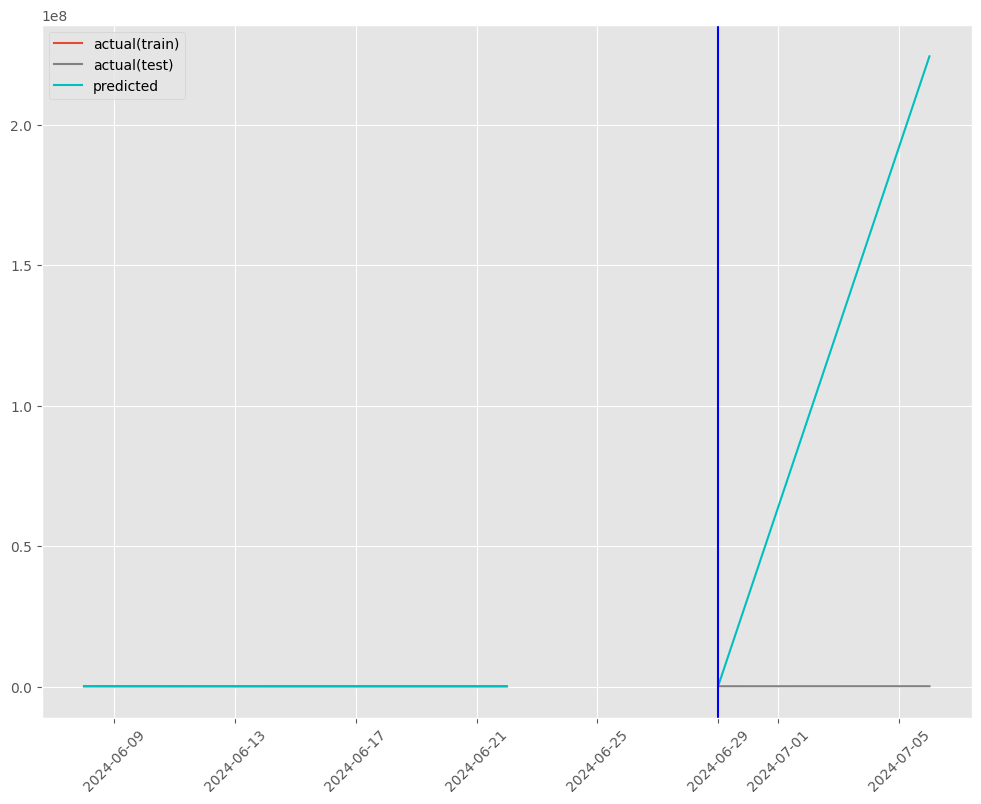

In [53]:
# plot the grapg（actual and predicted value）

import datetime
fig, ax = plt.subplots()

# actual value
## train
ax.plot(train.index, y_train, label='actual(train)')
## test
ax.plot(test.index, y_test, label='actual(test)', color='gray')

# predicted value
## train
ax.plot(train.index, train_pred, color='c')
## test
ax.plot(test.index, test_pred, label="predicted", color="c") 

# Depiction of vertical lines between training and test data
ax.axvline(datetime.datetime(2024,6,29),color='blue')

ax.legend()

plt.xticks(rotation=45)
plt.show()

### Ridge

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Preprocessing sales data: remove 'k' and convert to numeric
#df['sales'] = df['sales'].str.replace('k', '').astype(float) * 1000

# Select features (all columns from C onward) and target ('sales')
X = df.iloc[:, 2:]  # All columns except 'weekly' and 'sales'
y = df['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the Ridge regression model
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge.fit(X_train, y_train)

# Make predictions
y_pred = ridge.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

rmse, mae, mape, y_pred[:5]  # Show the RMSE, MAE, MAPE and first few predictions


(0.0074251768940768025,
 0.005703835384338163,
 3.514806297536703e-08,
 array([138900.00094994, 164799.98954227]))

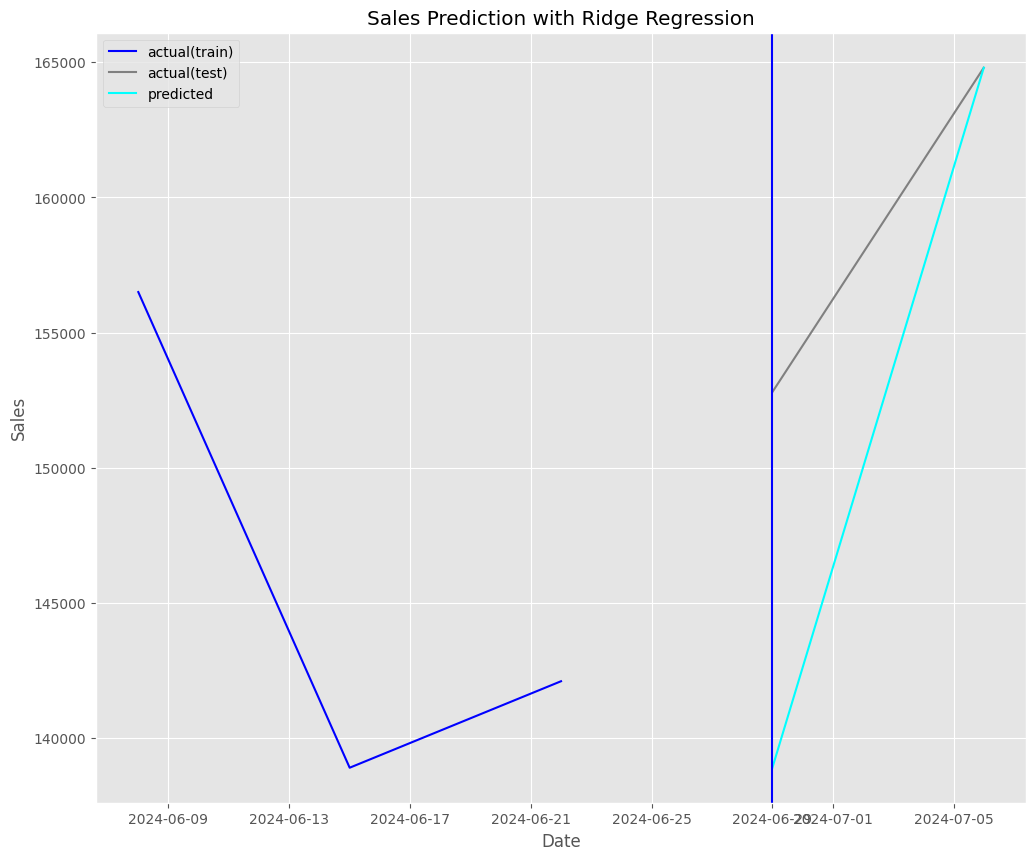

In [55]:
import matplotlib.pyplot as plt

# Split the original data to distinguish between train and test sets
train_size = int(len(y) * 0.6)
train_index = df.index[:train_size]
test_index = df.index[train_size:]

# Plotting the data
plt.figure(figsize=(12, 10))

# Actual train data
plt.plot(train_index, y[:train_size], color='blue', label='actual(train)')

# Actual test data
plt.plot(test_index, y[train_size:], color='gray', label='actual(test)')

# Predicted test data
plt.plot(test_index, y_pred, color='cyan', label='predicted')

# Vertical line to separate train and test
plt.axvline(x=test_index[0], color='blue')

# Adding labels and legend
plt.legend()
plt.title('Sales Prediction with Ridge Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Lasso

RMSE: 11786.239758738402
MAE: 10123.467110887592
MAPE: 0.06374132804047737
First 5 Predictions: [142987.6687954  148640.73457362]


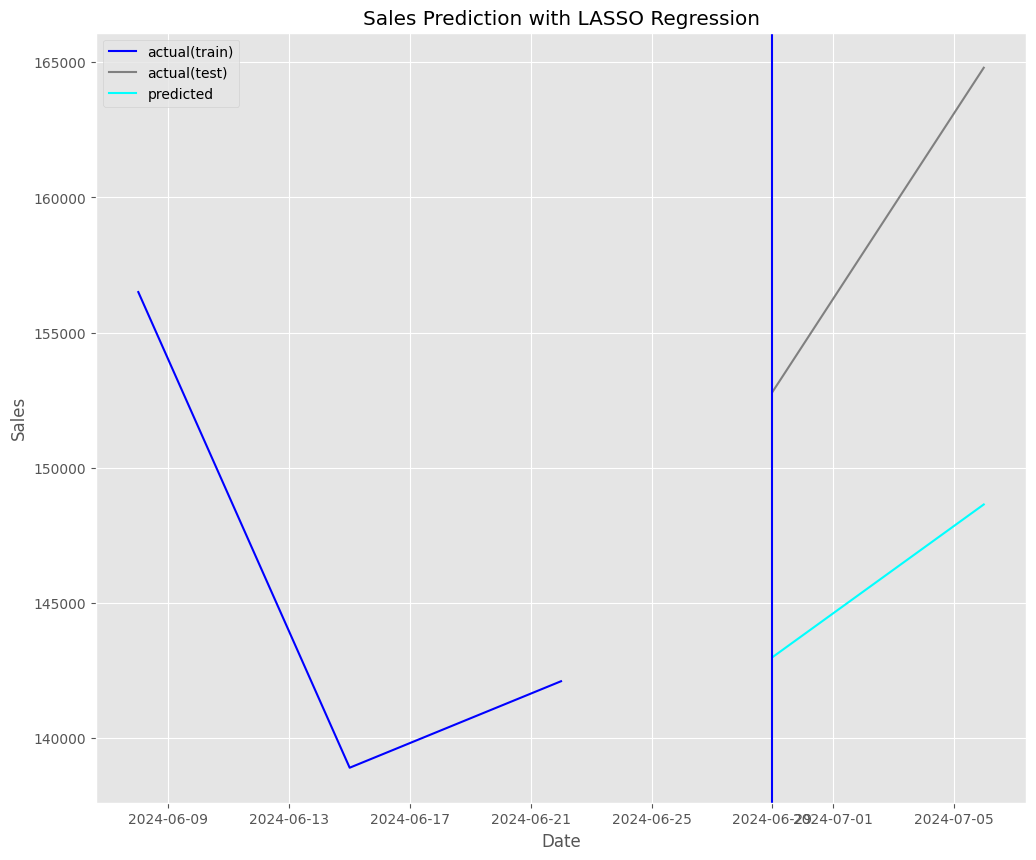

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing sales data: remove 'k' and convert to numeric (必要に応じて)
# df['sales'] = df['sales'].str.replace('k', '').astype(float) * 1000

# Select features (all columns from C onward) and target ('sales')
X = df.iloc[:, 2:]  # All columns except 'weekly' and 'sales'
y = df['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the LASSO regression model
lasso = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
lasso.fit(X_train, y_train)

# Make predictions
y_pred = lasso.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("First 5 Predictions:", y_pred[:5])

# Split the original data to distinguish between train and test sets
train_size = int(len(y) * 0.6)
train_index = df.index[:train_size]
test_index = df.index[train_size:]

# Plotting the data
plt.figure(figsize=(12, 10))

# Actual train data
plt.plot(train_index, y[:train_size], color='blue', label='actual(train)')

# Actual test data
plt.plot(test_index, y[train_size:], color='gray', label='actual(test)')

# Predicted test data
plt.plot(test_index, y_pred, color='cyan', label='predicted')

# Vertical line to separate train and test
plt.axvline(x=test_index[0], color='blue')

# Adding labels and legend
plt.legend()
plt.title('Sales Prediction with LASSO Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()
